In [12]:
import numpy as np
import geopandas as gpd
import pandas as pd
import fiona
import matplotlib.pyplot as plt
import os

In [2]:
gpd.__version__

'0.6.1+46.g6be674d'

In [3]:
regions = ["1", "2", "3", "4A", "4B", "5", "6", "7", "8", "9", "10", "11", "12", "13", "CAR", "ARMM", "NCR"]

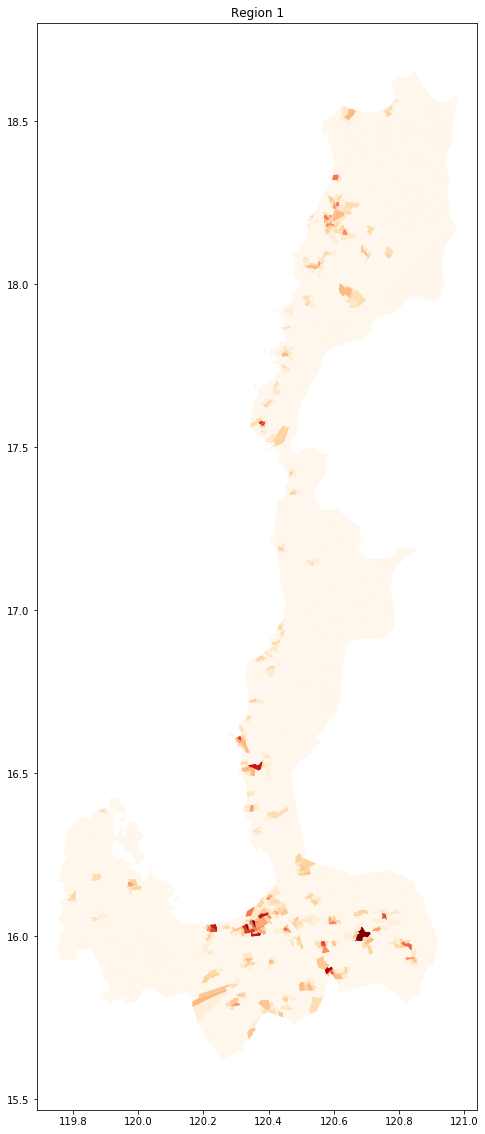

/home/cdiaz/.conda-envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


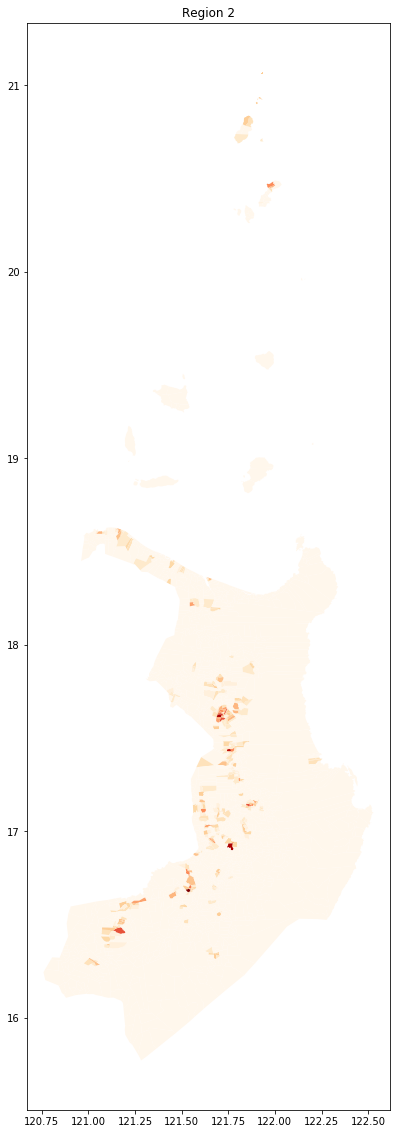

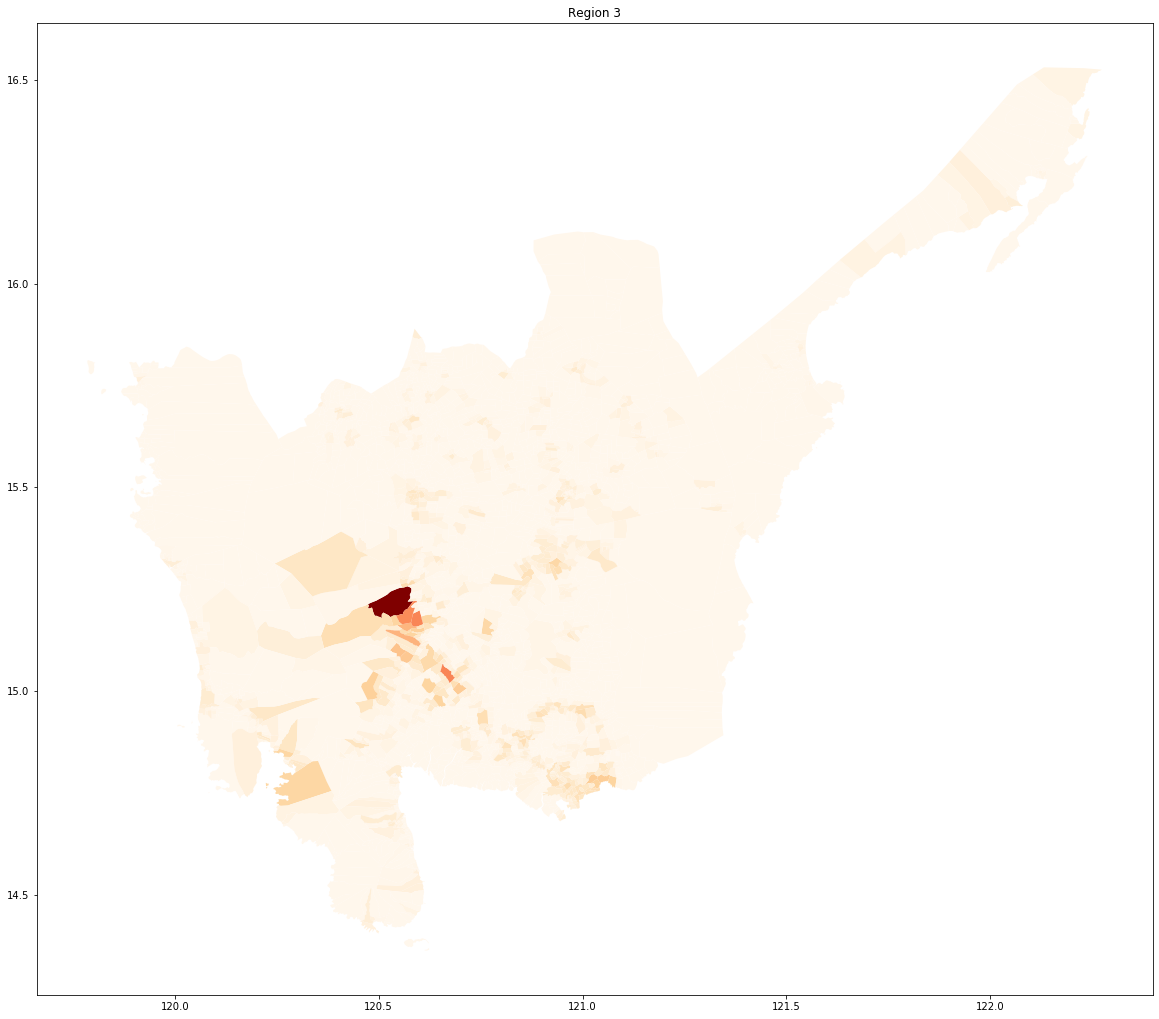

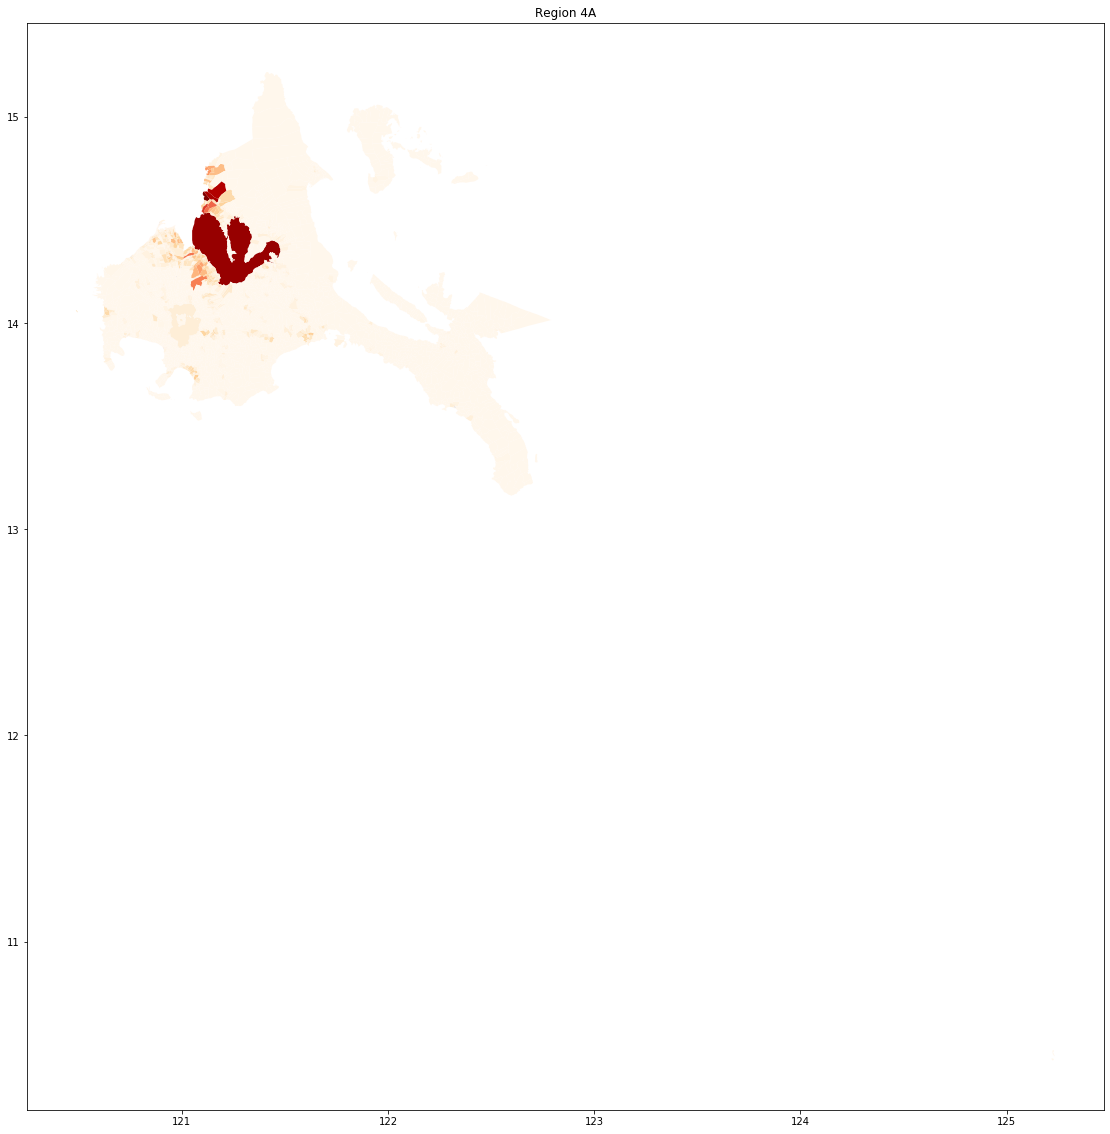

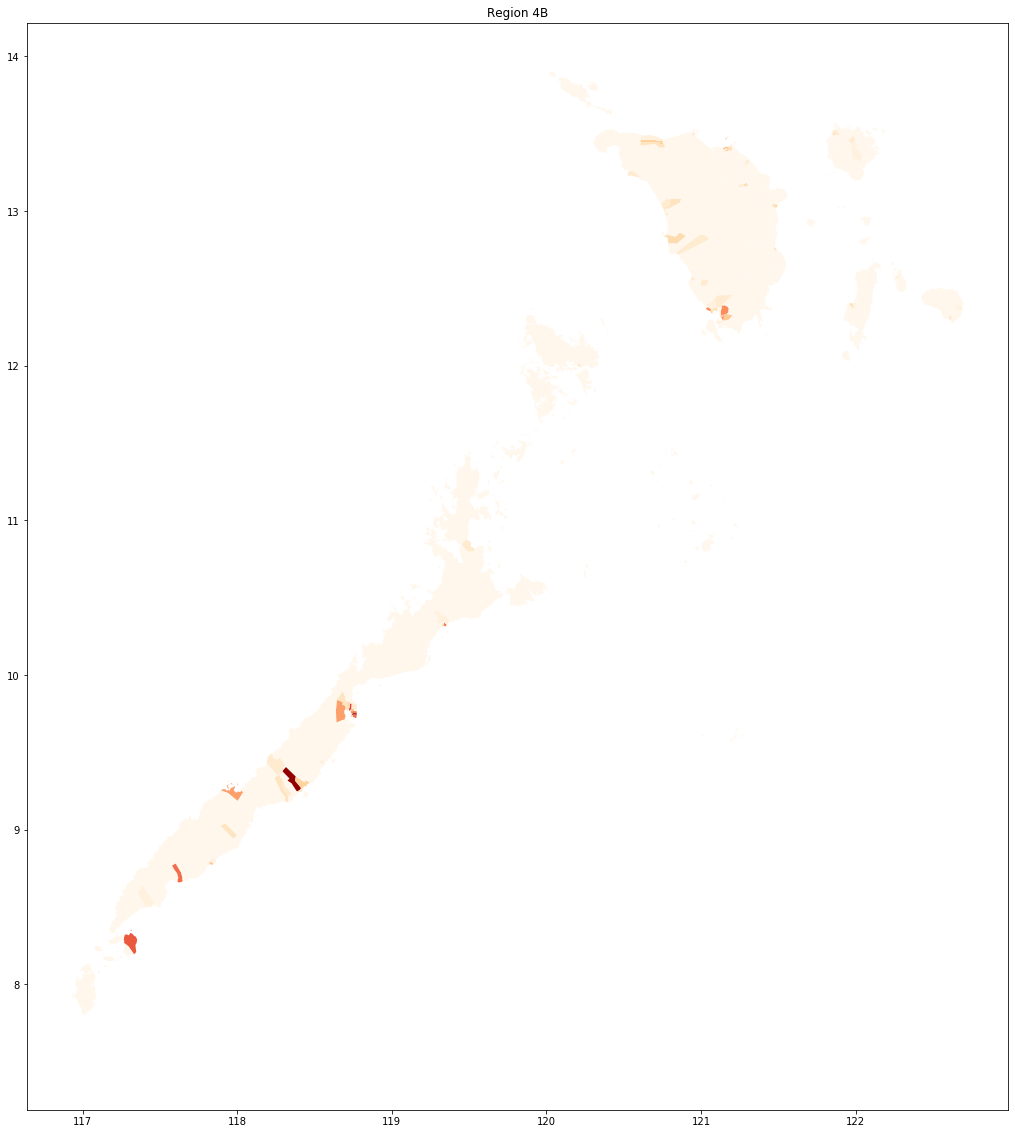

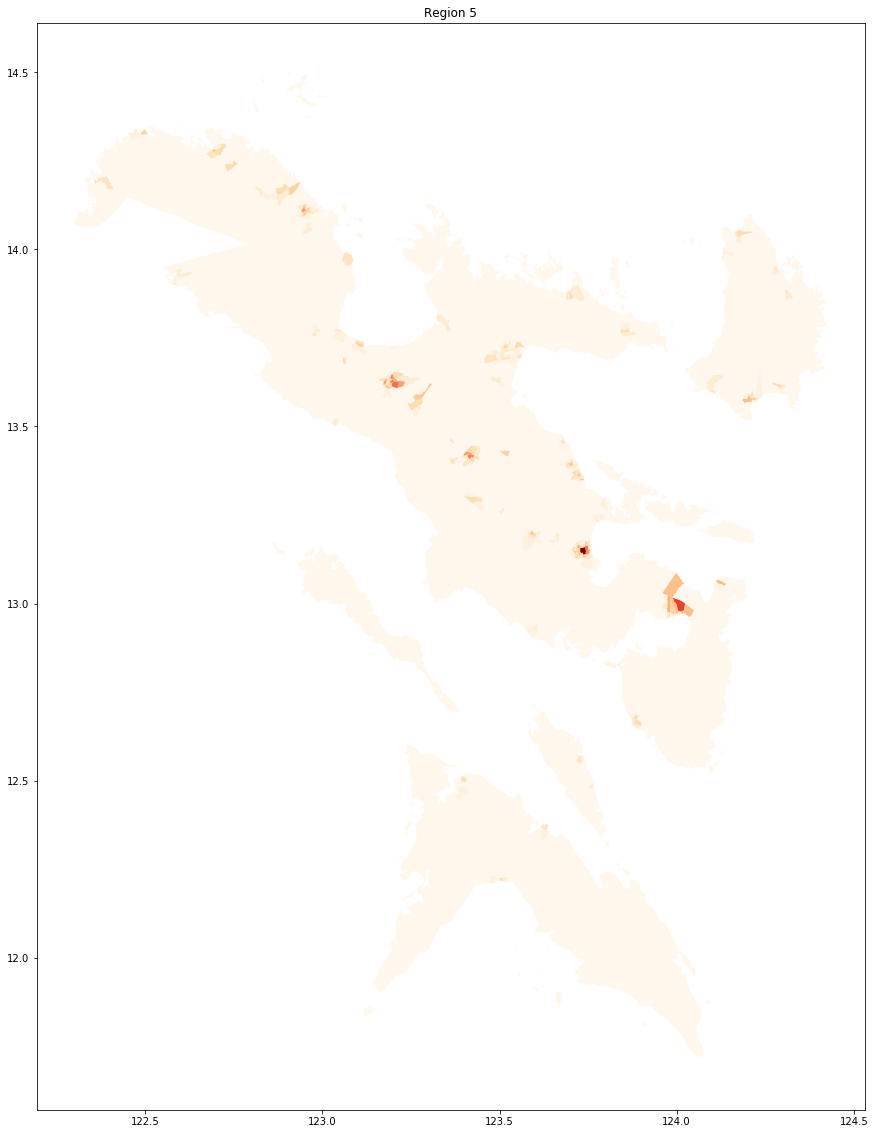

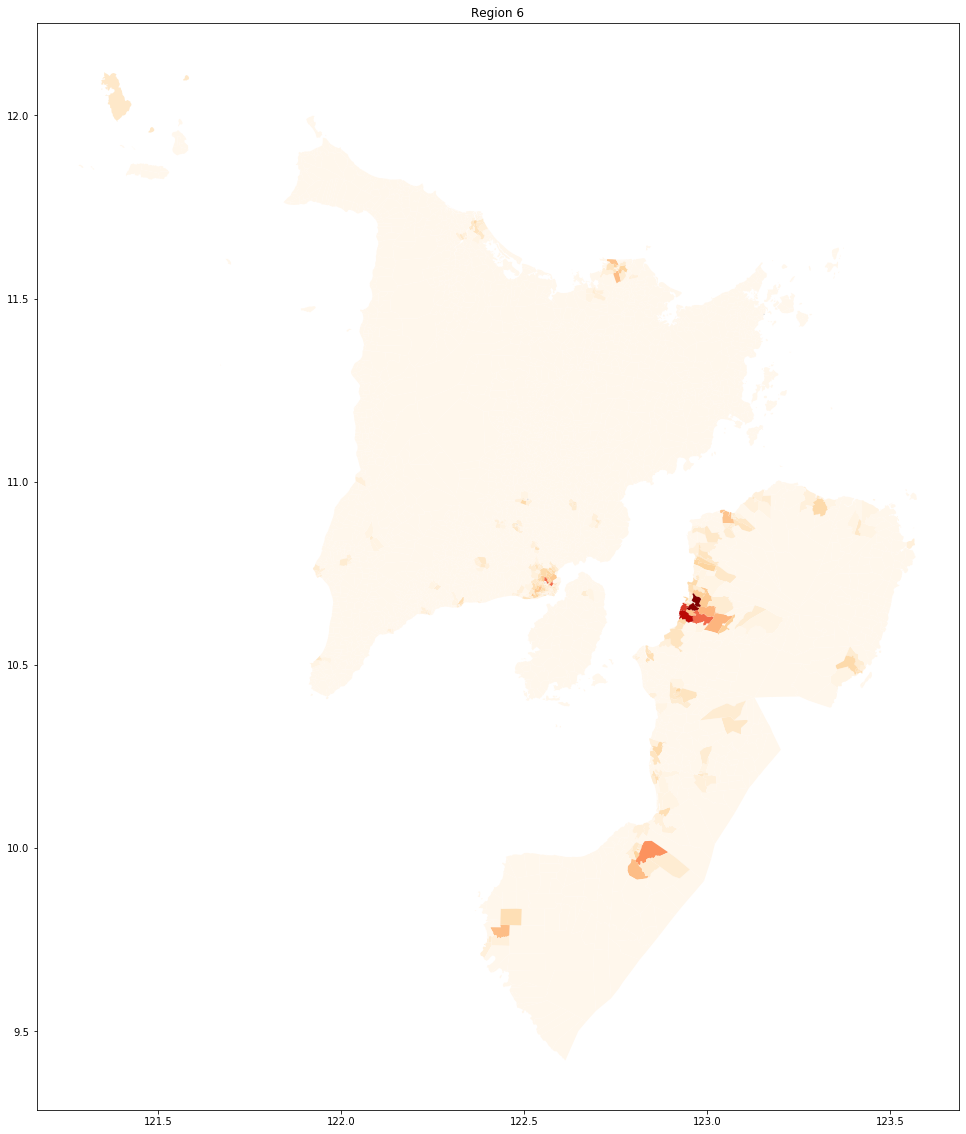

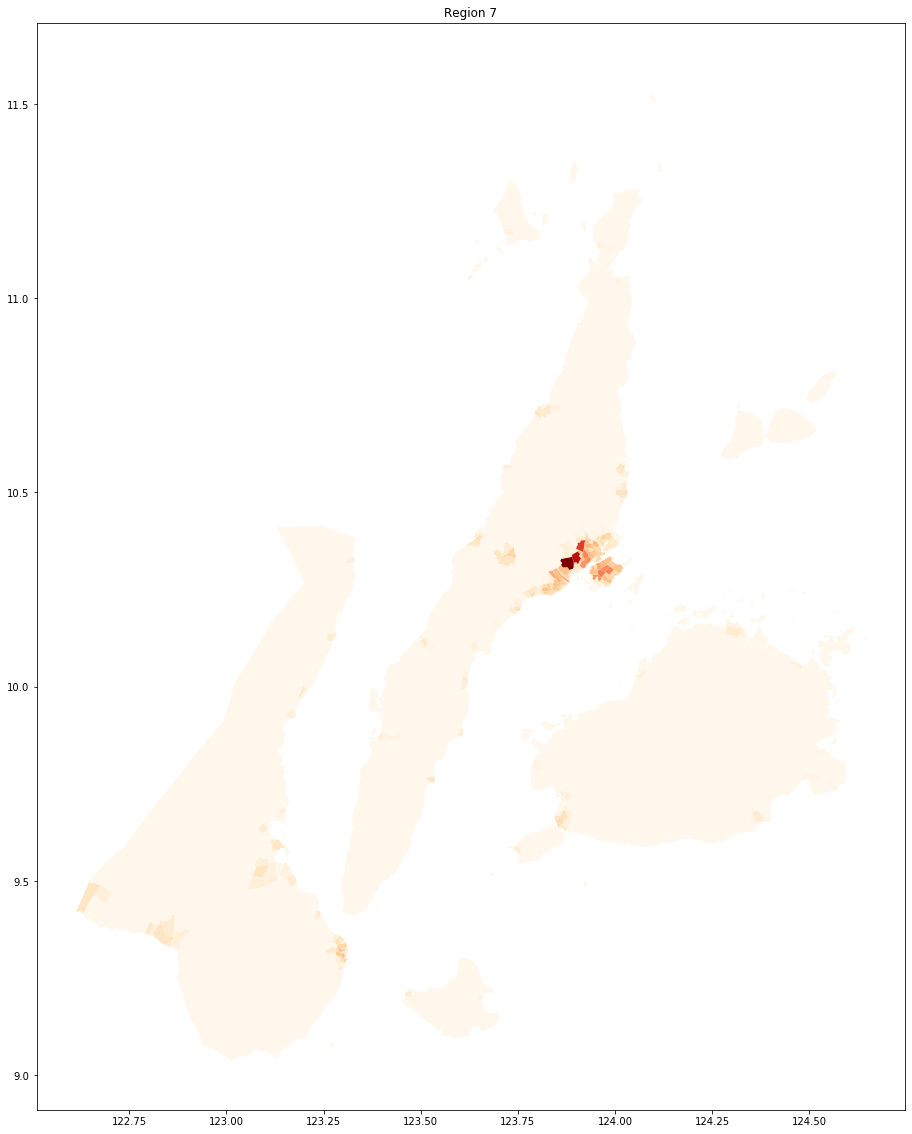

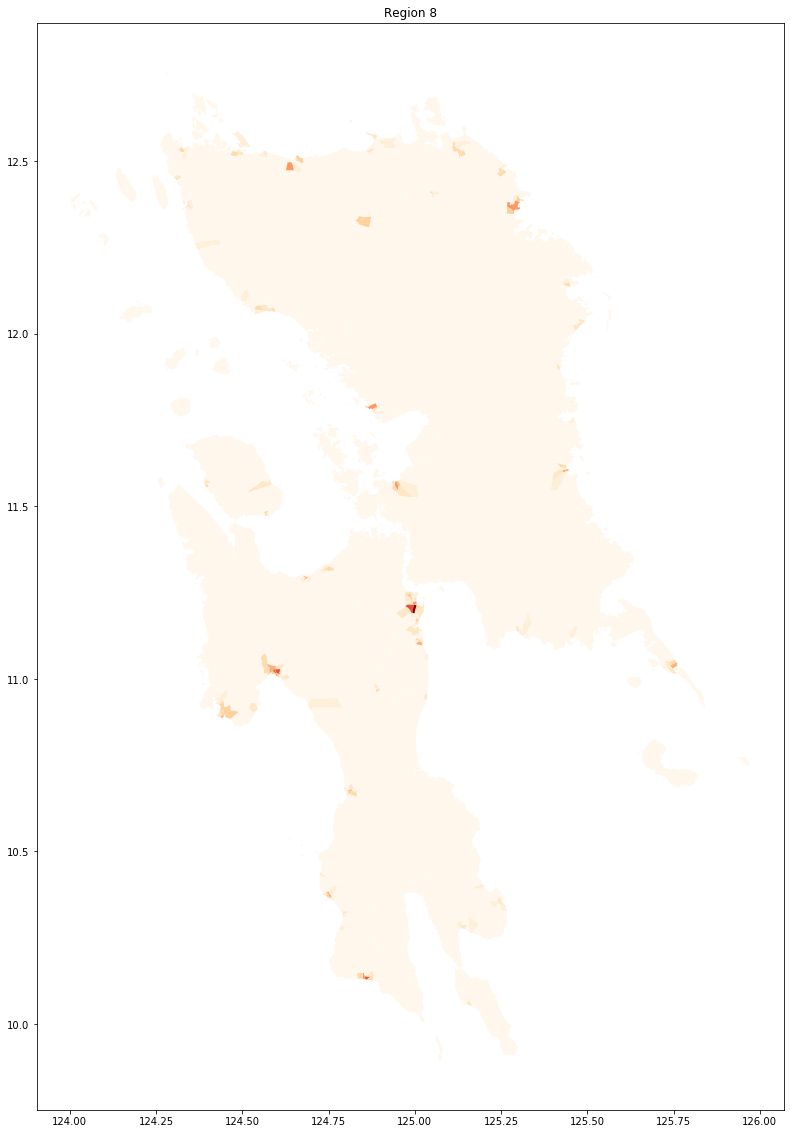

/home/cdiaz/.conda-envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


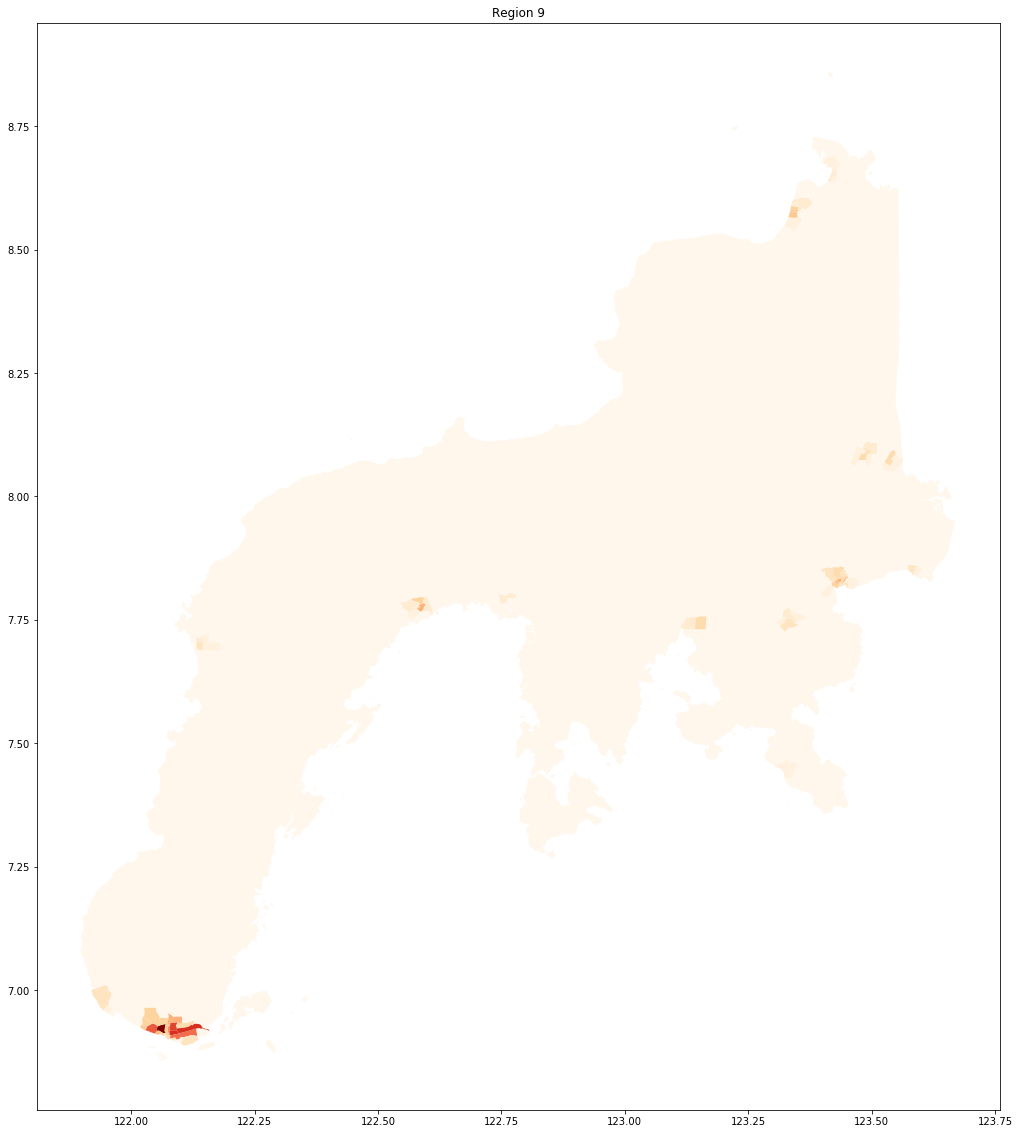

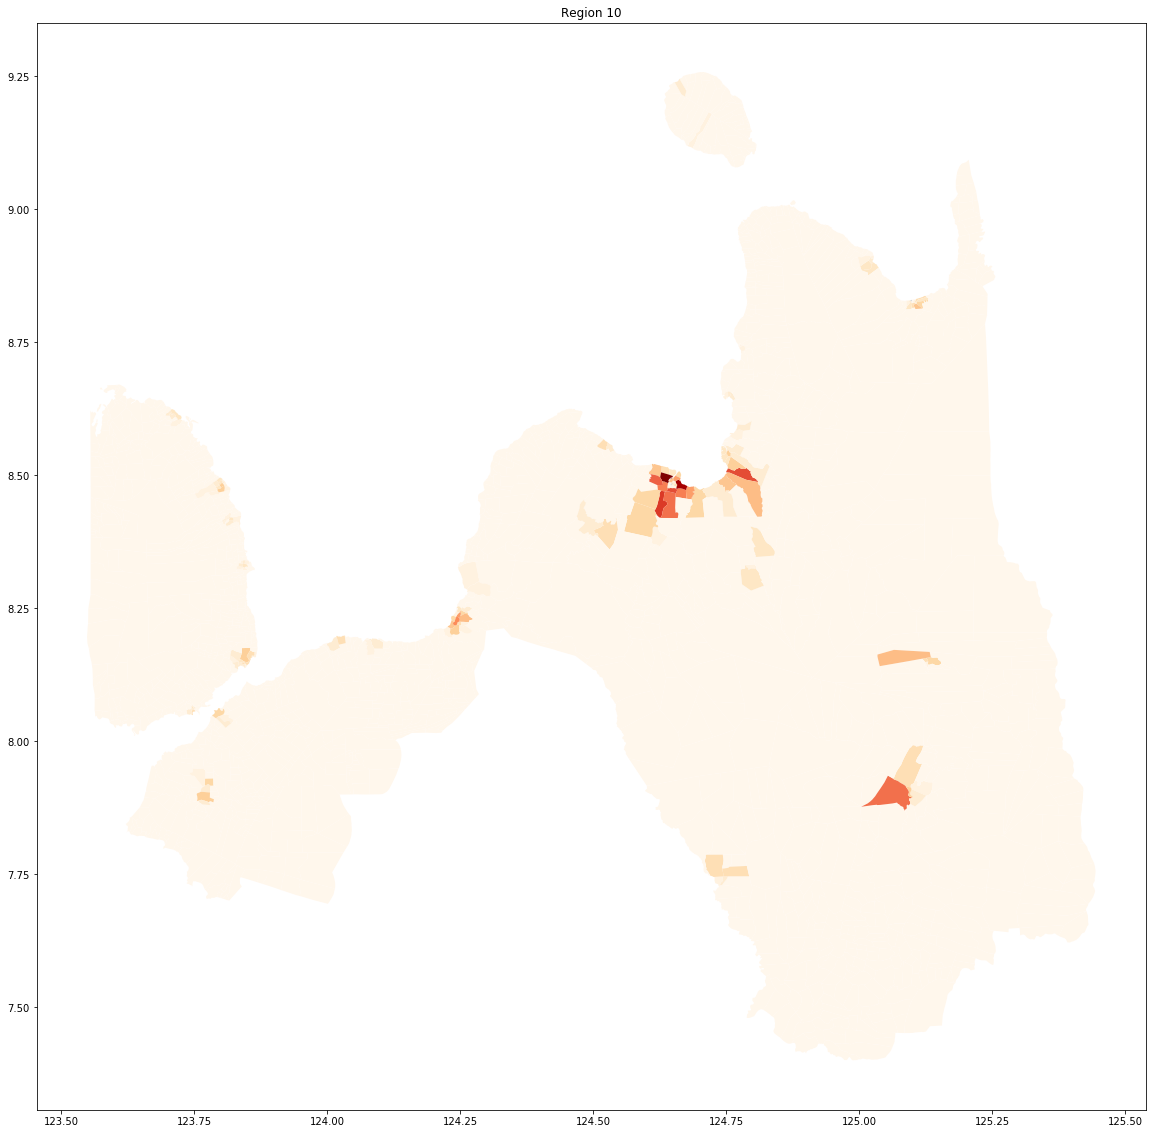

/home/cdiaz/.conda-envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


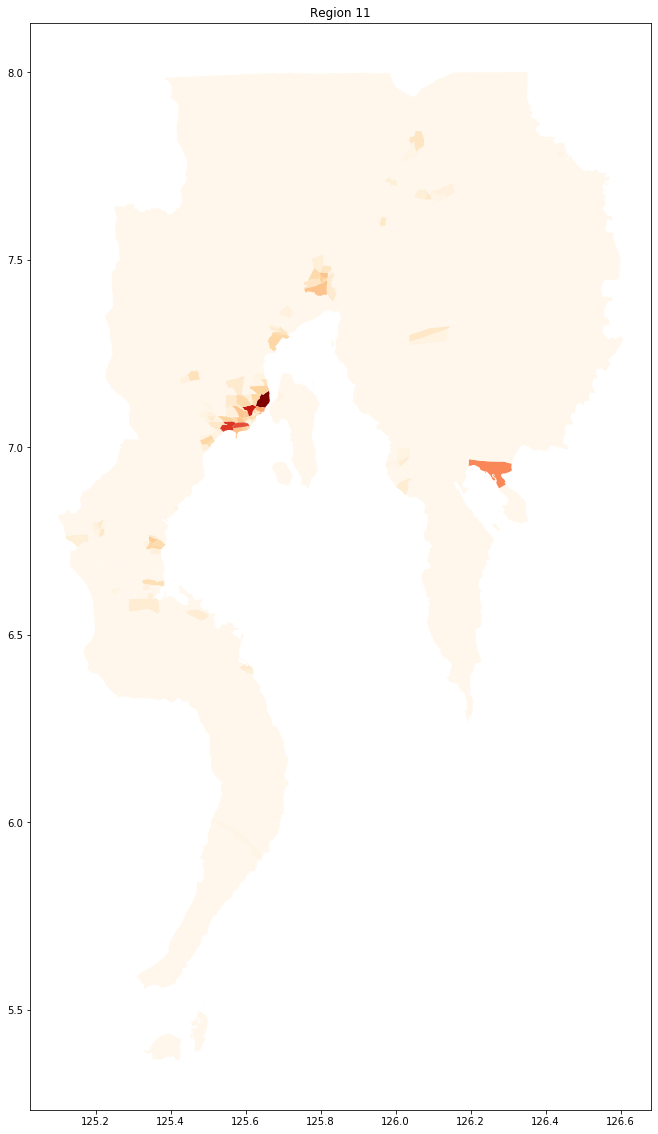

/home/cdiaz/.conda-envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


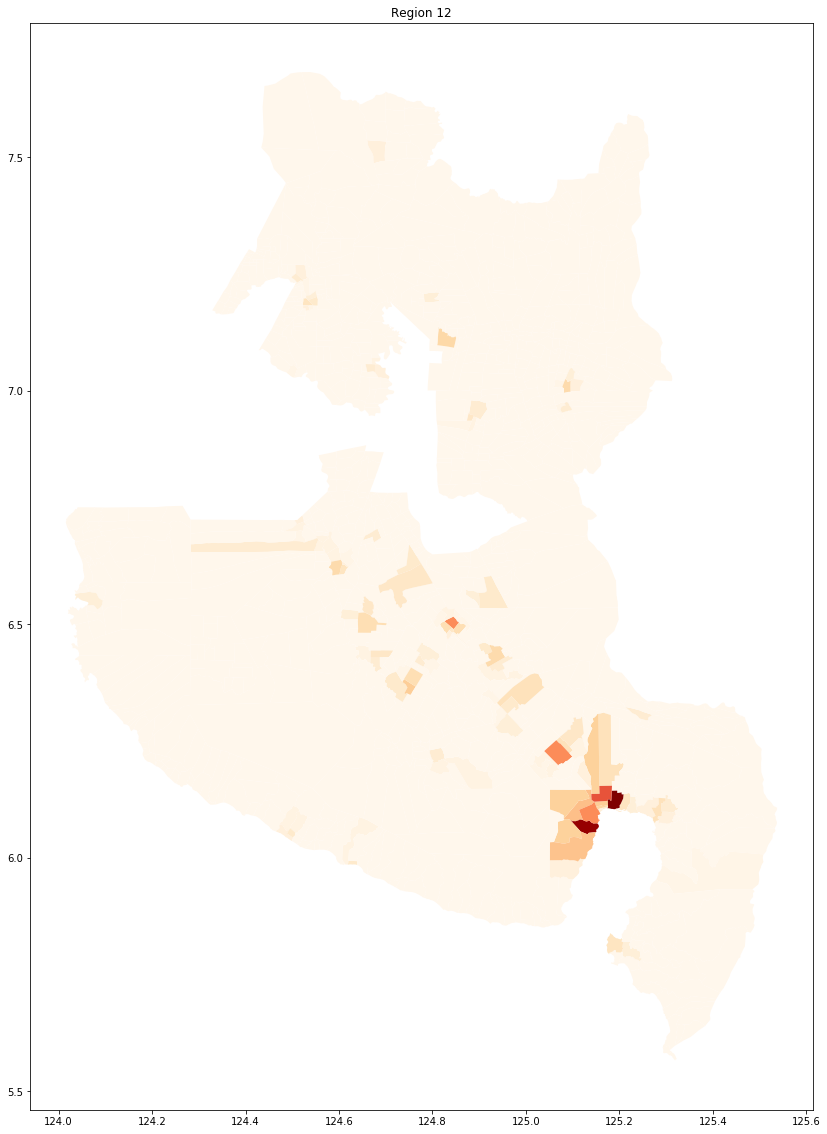

/home/cdiaz/.conda-envs/geospatial/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


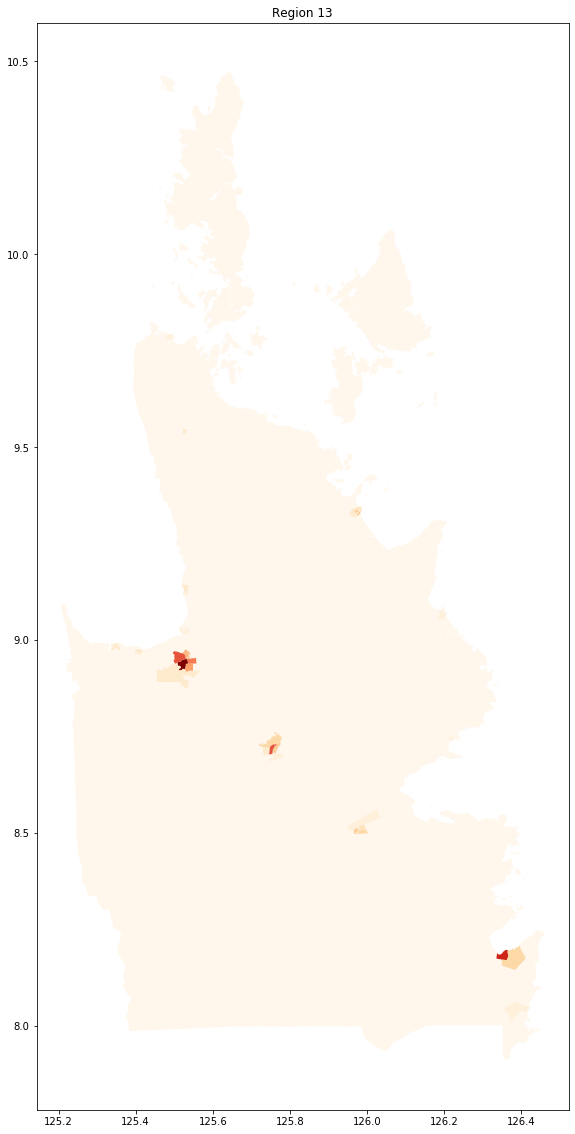

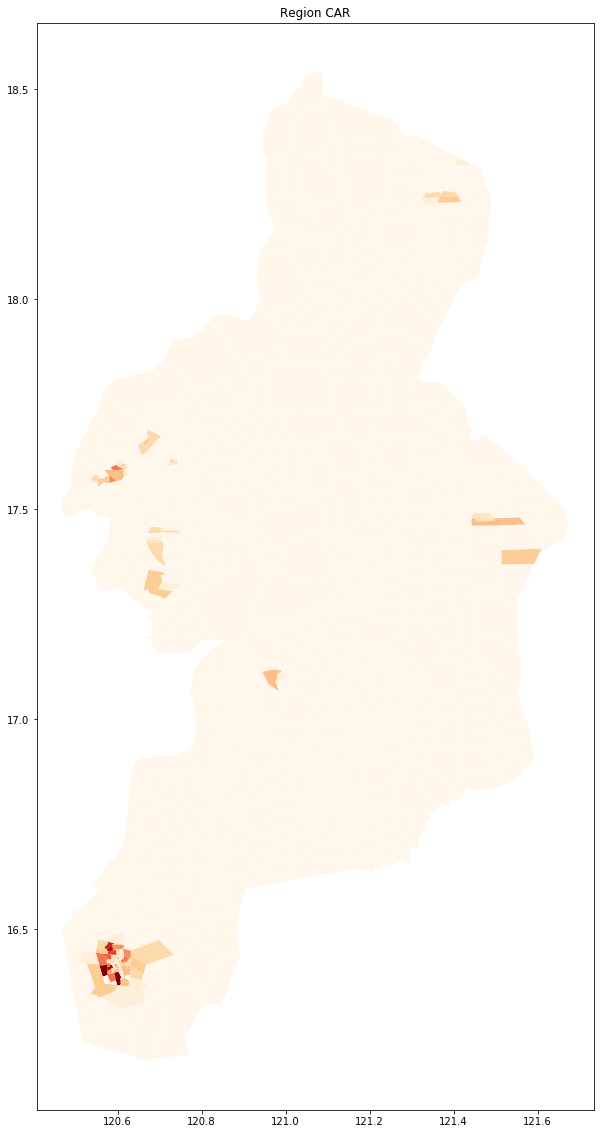

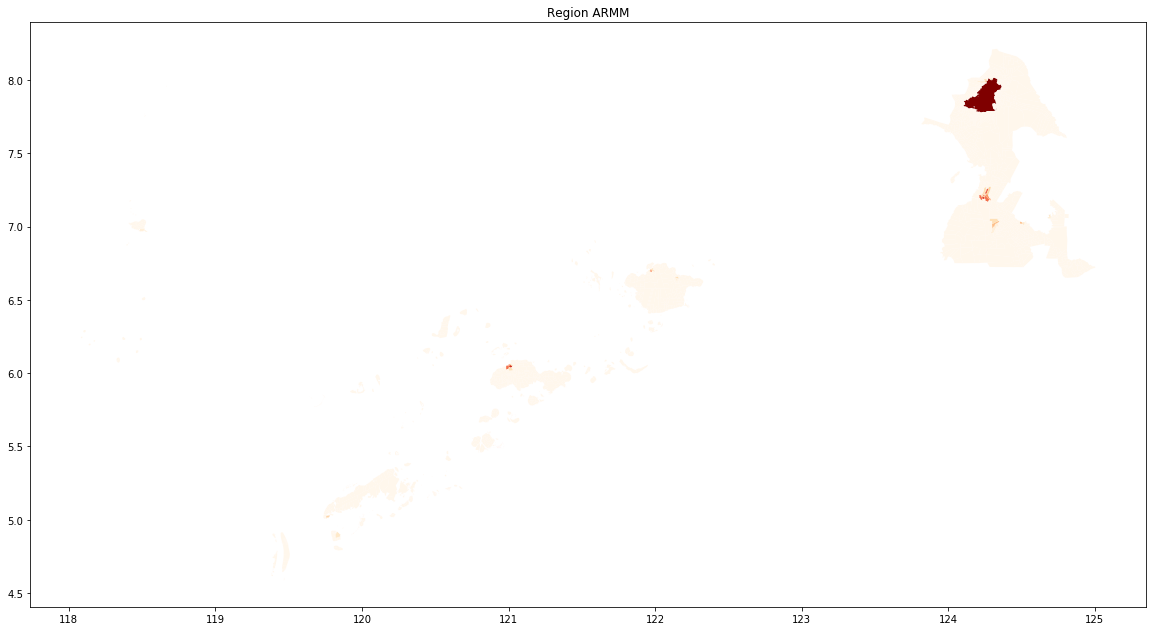

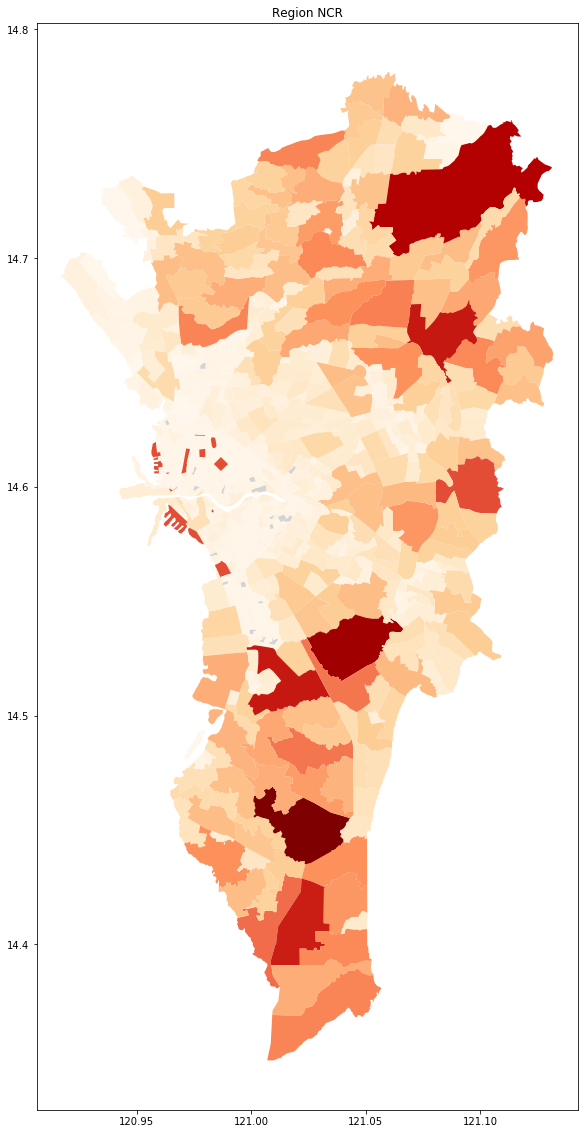

In [11]:
for i in regions:
    lulc = pd.read_csv("Statistics/Region {}.csv".format(i))
    region_gdf = gpd.read_file("Philippine Subsets/Region {}.shp".format(i))
    
    lulc_urban = pd.DataFrame(columns = ['aid','urban'])
    lulc_urban['aid'] = lulc['aid']
    lulc_urban['urban'] = lulc['(13) Urban and Built-up Lands'].fillna(0)

    if len(lulc_urban) == int(lulc_urban['aid'].max()[3:]):
        region_gdf.insert(17, 'Urban Tiles', lulc_urban['urban'])
    else:
        lulc_final = lulc_urban
        lulc_final = lulc_final.reindex(index = np.arange(0,len(region_gdf)))
        for row in lulc_final.index:
            try:
                lulc_final.iloc[[row]] = lulc_urban[lulc_urban['aid'] == 'aid'+'{:04d}'.format(row+1)].set_index(np.array([row]))
            except:
                lulc_final.iloc[[row]] = pd.DataFrame({"aid": "aid"+'{:04d}'.format(row+1), "urban": np.nan}, index=[row])
        region_gdf.insert(17, 'Urban Tiles', lulc_final['urban'])
    region_gdf.plot(column = 'Urban Tiles', cmap = "OrRd", figsize = [20,20], missing_kwds= dict(color = "lightgrey",))
    plt.title("Region {}".format(i))
    plt.show()
    region_gdf.to_file("Philippine Subsets/Regions with Urban Tiles/Region {}.shp".format(i))

In [5]:
i= '3'
lulc = pd.read_csv("Statistics/Region "+i+".csv")
region_gdf = gpd.read_file("Philippine Subsets/Region "+i+".shp")

lulc_urban = pd.DataFrame(columns = ['aid','urban'])
lulc_urban['aid'] = lulc['aid']
lulc_urban['urban'] = lulc['(13) Urban and Built-up Lands'].fillna(0)

if len(lulc_urban) == int(lulc_urban['aid'].max()[3:]):
    region_gdf.insert(17, 'Urban Tiles', lulc_urban['urban'])
    region_gdf.plot(column = 'Urban Tiles', cmap = "OrRd", figsize = [20,20])
    plt.show()
else:
    lulc_final = lulc_urban
    lulc_final = lulc_final.reindex(index = np.arange(0,len(region_gdf)))
    for row in lulc_final.index:
        try:
            lulc_final.iloc[[row]] = lulc_urban[lulc_urban['aid'] == 'aid'+'{:04d}'.format(row+1)].set_index(np.array([row]))
        except:
            print(row)
            lulc_final.iloc[[row]] = pd.DataFrame({"aid": "aid"+'{:04d}'.format(row+1), "urban": np.nan}, index=[row])

318


In [13]:
#https://stackoverflow.com/questions/48874113/concat-multiple-shapefiles-via-geopandas
folder = "Philippine Subsets/Regions with Urban Tiles"
file = os.listdir(folder)
path = [os.path.join(folder, i) for i in file if ".shp" in i]

ph_urban_gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path], 
                        ignore_index=True), crs=gpd.read_file(path[0]).crs)

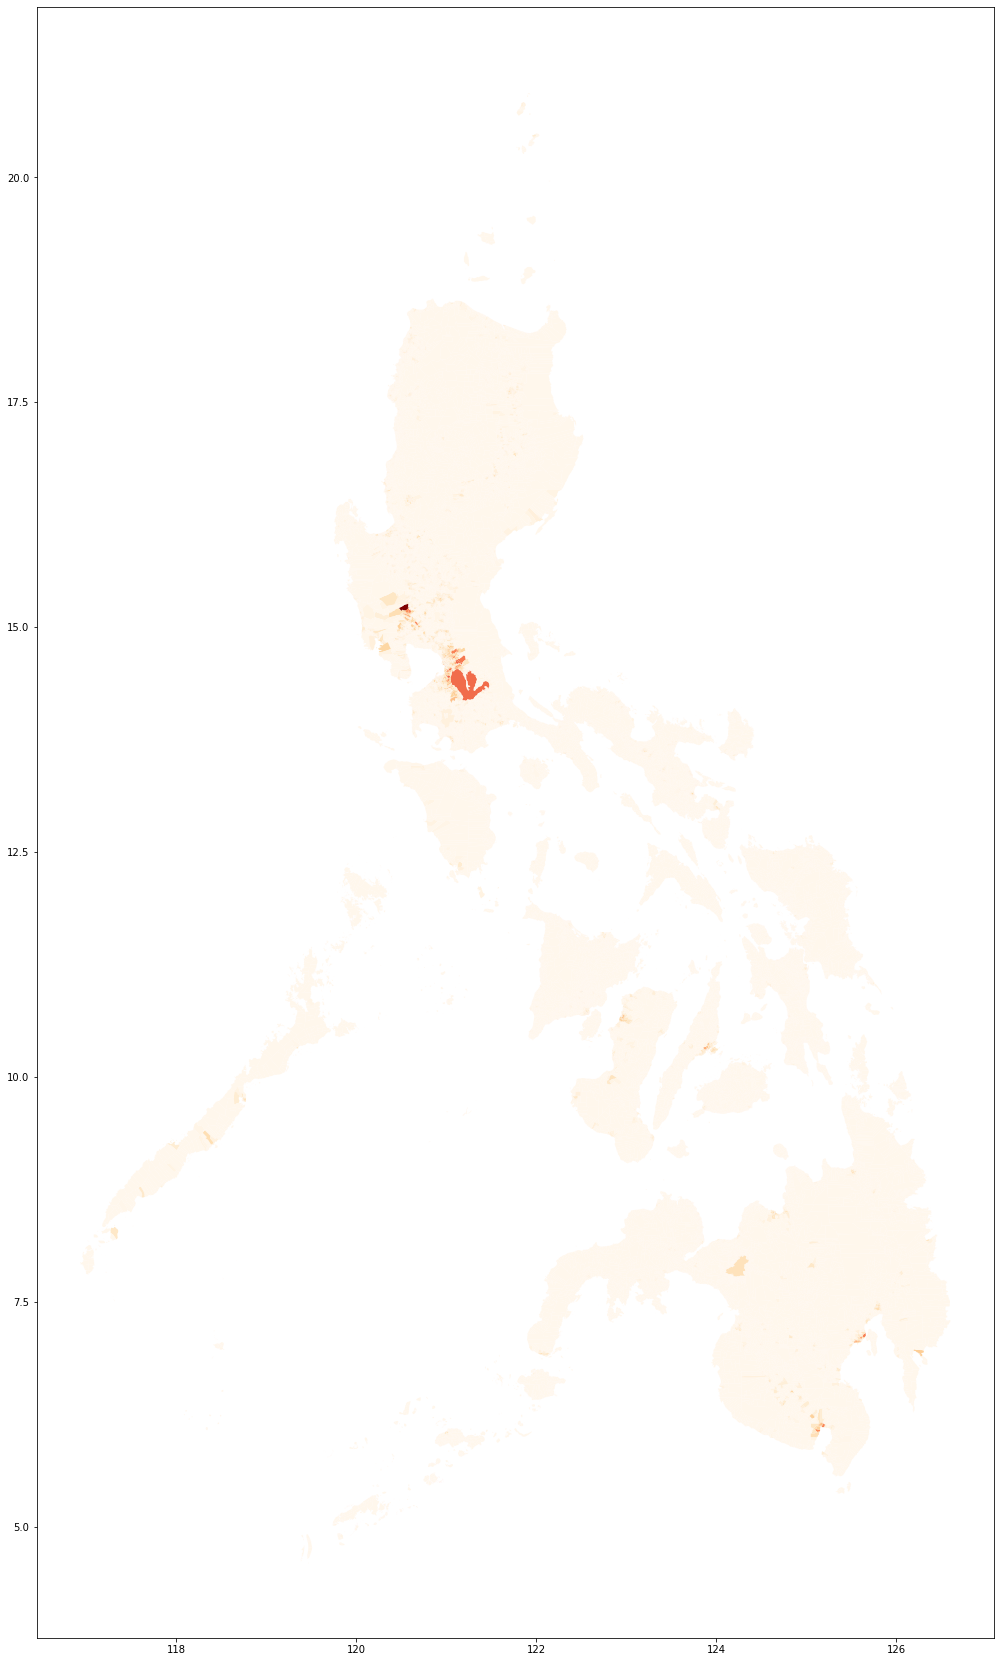

In [18]:
ph_urban_gdf.plot(column = 'Urban Tile', cmap = "OrRd", figsize = [30,30], missing_kwds= dict(color = "lightgrey",))

In [51]:
ph_urban_gdf.to_file("Shapefiles/Final Philippine Data.shp")

(array([3.015e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.449e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.420e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.370e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.120e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 2.920e+02, 0.000e+00, 0.000e+00, 1.990e+02,
        0.000e+00, 0.000e+00, 1.640e+02, 0.000e+00, 0.000e+00, 1.040e+02,
        0.000e+00, 1.040e+02, 0.000e+00, 7.200e+01, 0.000e+00, 8.000e+01,
        0.000e+00, 6.100e+01, 5.900e+01, 0.000e+00, 3.500e+01, 3.700e+01,
        0.000e+00, 2.300e+01, 2.400e+01, 2.200e+01, 1.600e+01, 1.100e+01,
        1.400e+01, 1.200e+01, 1.200e+01, 1.000e+01, 9.000e+00, 1.100e+01,
        6.000e+00, 6.000e+00, 1.000e+01, 4.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 4.000e+0

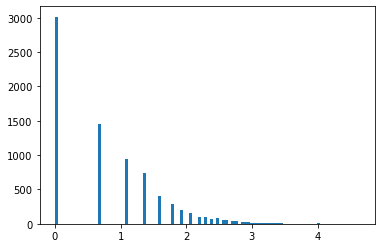

In [44]:
urban_arr = ph_urban_gdf['Urban Tile']
b = np.log(urban_arr[np.isfinite(urban_arr)])
plt.hist(b[np.isfinite(b)] , bins = 100)

In [52]:
urban_arr.max()

103.0